# **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Importing Essential Libraries**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# ***Taking Data For Training and Testing***


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

11501568/11490434 [==============================] - 0s 0us/step


# **Creating Model**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# **Training The Model**


In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9760


# **Checking Accuracy of Model**


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

model.save('digits.model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9717
0.9717000126838684
0.090172678232193
INFO:tensorflow:Assets written to: digits.model/assets


# **Validation**

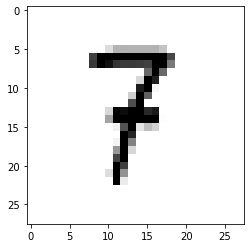

This is probably 7


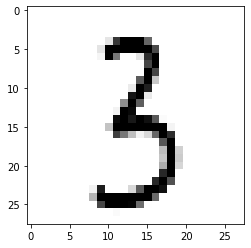

This is probably 3


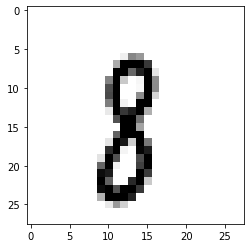

This is probably 8


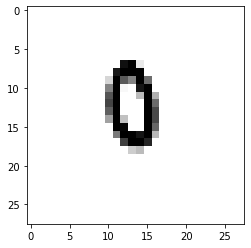

This is probably 9


In [ ]:
for i in range(1, 5):
  img = cv.imread(f'/content/drive/MyDrive/ValidationData/{i}.png')[:,:,0]
  img = np.invert(np.array([img]))

  prediction = model.predict(img)
  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()
  print(f'This is probably {np.argmax(prediction)}')